In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

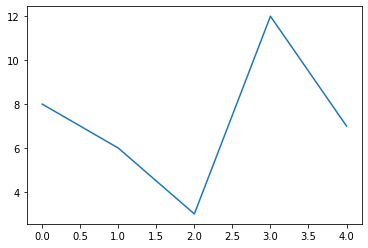

In [2]:
plt.plot([8, 6, 3, 12, 7])
plt.show()

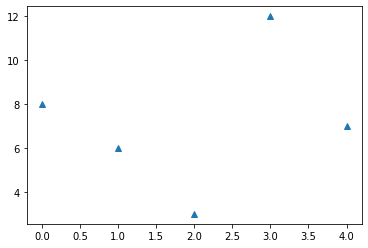

In [3]:
plt.plot([8, 6, 3, 12, 7], '^')
plt.show()

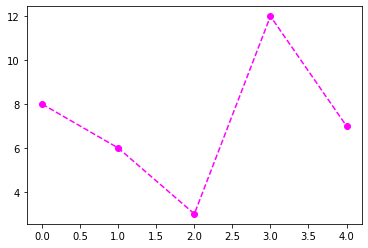

In [4]:
plt.plot([8, 6, 3, 12, 7], marker= 'o', color= 'magenta',
        linestyle= 'dashed')
plt.show()

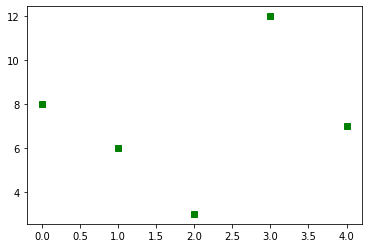

In [5]:
plt.plot([8, 6, 3, 12, 7], 'gs')
plt.show()

In [4]:
#to read excel
#lures = pd.read_excel("dataset/LURES.xlsx", sheet_name= 'LURES')

lures = pd.read_csv('datasets/lures.csv')
lures.head()

,QUANTITY,SALES,DATE,PRODUCT,CATEGORY,PRICE,QUALITY,SALES_PERSON,SHOP,CITY,REGION
0,1,7.45,1/1/2016,Trout Performance,Lake,7.45,NORMAL,Henry Jacobs,Anglers United,Los Angeles,West
1,1,5.65,1/1/2016,Minnow Glitter,River,5.65,TOP,Nora Pollack,Happy Fisherman,Chicago,North
2,2,13.98,1/1/2016,Pike Magic,Lake,6.99,TOP,Tyler Lance,Fast Lures,New York,North
3,2,14.90,1/1/2016,Charles Lake Secret,Lake,7.45,NORMAL,Richard Smith,Lucky Lures,Seattle,West
4,3,22.35,1/1/2016,Charles Lake Secret,Lake,7.45,NORMAL,Henrik Griffin,Anglers United,Los Angeles,West


In [7]:
lures.shape

(20915, 11)

In [8]:
type(lures)

pandas.core.frame.DataFrame

In [9]:
lures.dtypes

QUANTITY          int64
SALES           float64
DATE             object
PRODUCT          object
CATEGORY         object
PRICE           float64
QUALITY          object
SALES_PERSON     object
SHOP             object
CITY             object
REGION           object
dtype: object

**scatter plot**

**mixing pyplot and pylab tools can cause inconsistencies and risk of bugs in code**

**pylot is preferred**

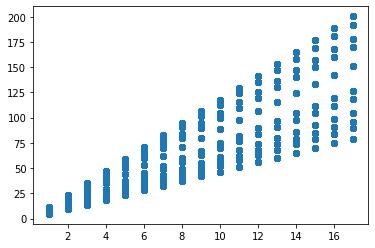

In [10]:
qty = lures['QUANTITY']
sales = lures['SALES']
plt.plot(qty, sales, 'o')

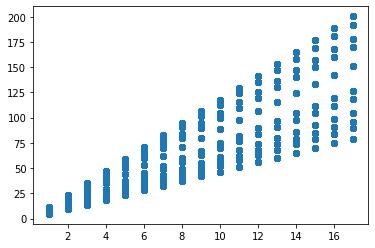

In [11]:
plt.scatter(qty, sales)

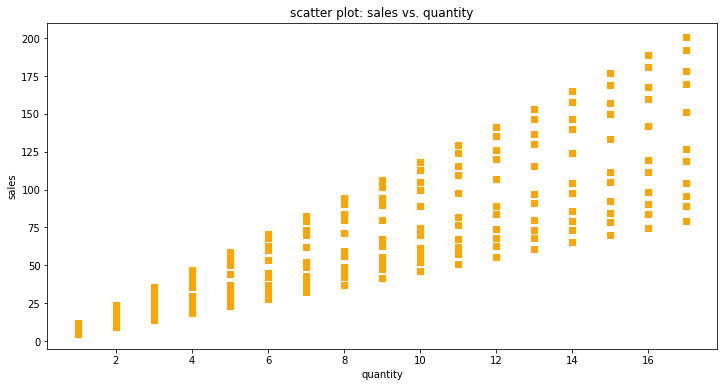

In [12]:
plt.figure(figsize= (12,6))
plt.scatter(qty, sales, marker= 's', color= 'orange')
plt.xlabel('quantity')
plt.ylabel('sales')
plt.title('scatter plot: sales vs. quantity')
plt.show()


**vis with pandas(uses pylab)**

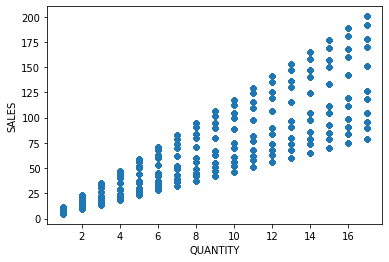

In [13]:
lures.plot(kind= 'scatter', x= 'QUANTITY', y= 'SALES')

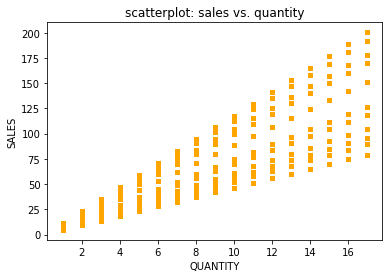

In [14]:
lures.plot(kind= 'scatter', x= 'QUANTITY', y= 'SALES',
          marker= 's', color= 'orange', title= 'scatterplot: sales vs. quantity')

**histogram**

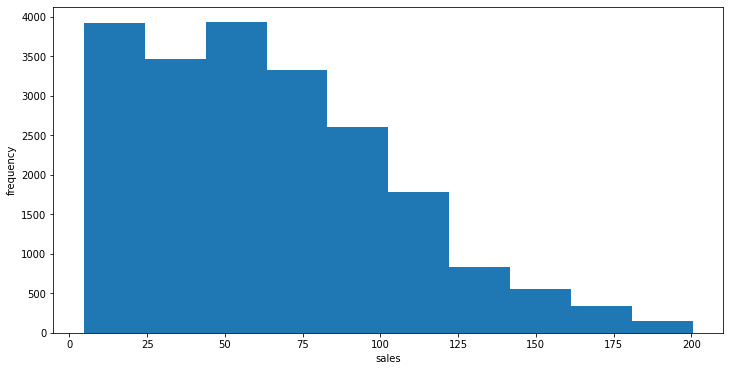

In [5]:
plt.figure(figsize= (12,6))
plt.hist(lures['SALES'])
plt.xlabel('sales')
plt.ylabel('frequency')
plt.show()

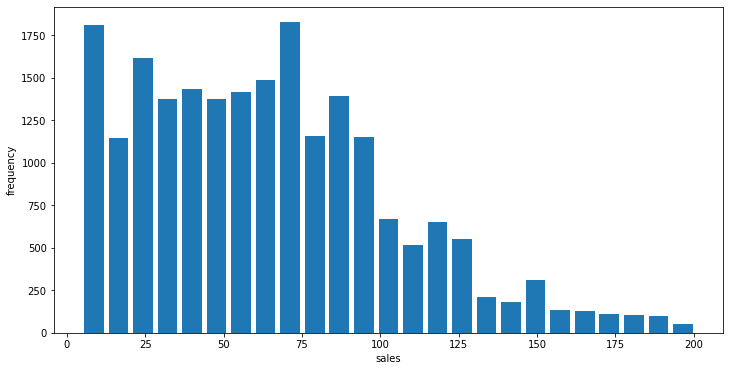

In [15]:
plt.figure(figsize= (12,6))
plt.hist(lures['SALES'], bins= 25, rwidth= 0.8)
plt.xlabel('sales')
plt.ylabel('frequency')
plt.show()

(array([3922., 3468., 3933., 3332., 2603., 1778.,  827.,  558.,  344.,
         150.]),
 array([  4.65 ,  24.228,  43.806,  63.384,  82.962, 102.54 , 122.118,
        141.696, 161.274, 180.852, 200.43 ]),
 <a list of 10 Patch objects>)

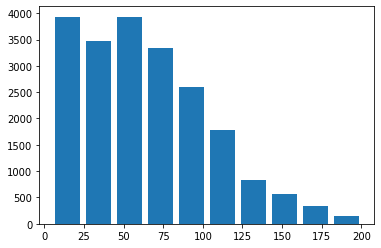

In [16]:
plt.hist(lures['SALES'], bins= 10, rwidth= 0.8)

**bar chart**

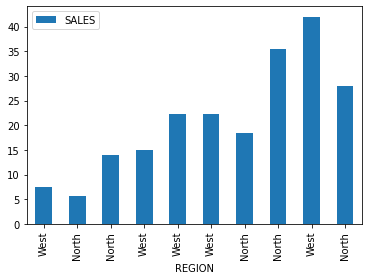

In [17]:
lures[0:10].plot(kind = 'bar', x= 'REGION', y = 'SALES')
#no grouping

In [18]:
#grouping bars by categories

lures_by_region = lures.groupby(['REGION'], as_index= False).sum()
lures_by_region

,REGION,QUANTITY,SALES,PRICE
0,North,74069,527398.13,58981.66
1,South,40979,300844.11,33430.75
2,West,73111,519195.89,57576.42


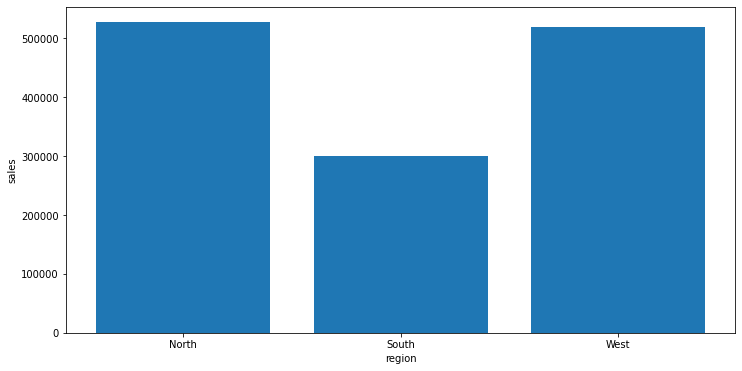

In [19]:
plt.figure(figsize= (12,6))
plt.bar(lures_by_region['REGION'], lures_by_region['SALES'])
plt.xlabel('region')
plt.ylabel('sales')
plt.show()

**time series chart**

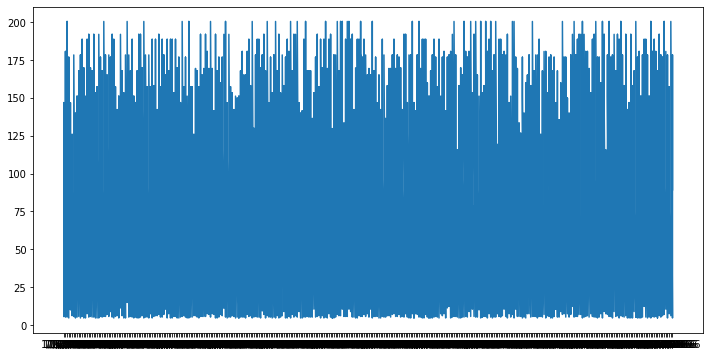

In [20]:
plt.figure(figsize= (12,6))
plt.plot(lures['DATE'], lures['SALES'])
plt.show()

In [21]:
lures['DATE'] = pd.to_datetime(lures['DATE'])
lures_by_day = lures.groupby(['DATE'], as_index= False).sum()
lures_by_day

,DATE,QUANTITY,SALES,PRICE
0,2016-01-01,487,3556.27,372.91
1,2016-01-02,598,4289.52,440.46
2,2016-01-03,504,3645.32,376.79
3,2016-01-04,520,3696.88,412.53
4,2016-01-05,577,3936.49,373.57
...,...,...,...,...
361,2016-12-27,564,4237.34,485.19
362,2016-12-28,513,3661.23,415.62
363,2016-12-29,582,4095.40,485.43
364,2016-12-30,528,3874.42,452.52


In [22]:
lures_by_day.dtypes

DATE        datetime64[ns]
QUANTITY             int64
SALES              float64
PRICE              float64
dtype: object

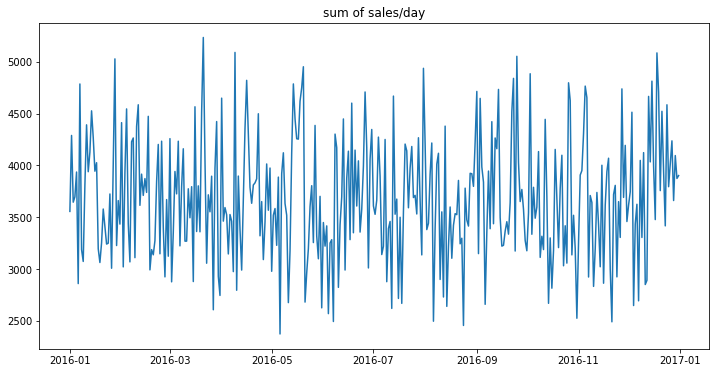

In [23]:
plt.figure(figsize= (12,6))
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.title('sum of sales/day')
plt.show()

**shared axis plot**

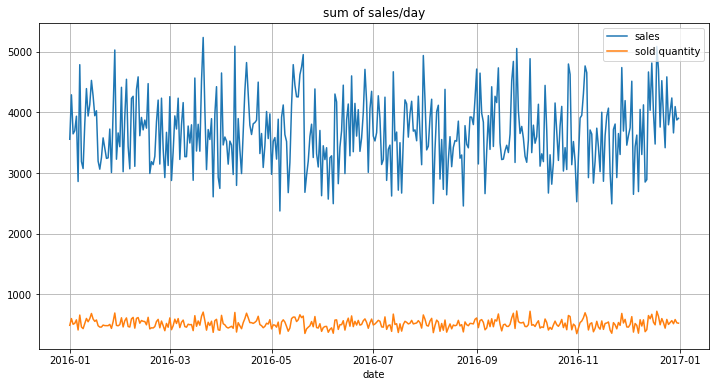

In [24]:
#line graph with two data series

plt.figure(figsize= (12,6))
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.plot(lures_by_day['DATE'], lures_by_day['QUANTITY'])
plt.legend(['sales', 'sold quantity'])
plt.xlabel('date')
plt.grid()
plt.title('sum of sales/day')
plt.show()

In [25]:
lures_by_city = lures.groupby('CITY', as_index= False).sum()
lures_by_city

,CITY,QUANTITY,SALES,PRICE
0,Austin,16697,119113.03,13123.48
1,Chicago,14493,102905.07,11671.09
2,Los Angeles,21443,147968.11,16871.99
3,Miami,24282,181731.08,20307.27
4,New York,59576,424493.06,47310.57
5,San Francisco,10500,80844.42,9012.28
6,Seattle,41168,290383.36,31692.15


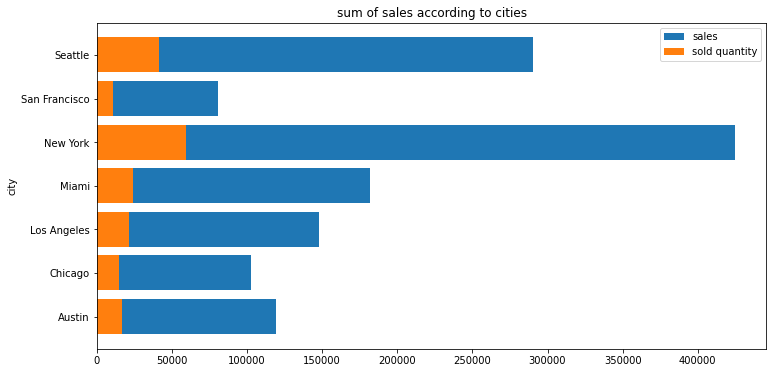

In [26]:
#stacked bar chart

plt.figure(figsize= (12,6))
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'])
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'])
plt.legend(['sales', 'sold quantity'])
plt.ylabel('city')
plt.title('sum of sales according to cities')
plt.show()

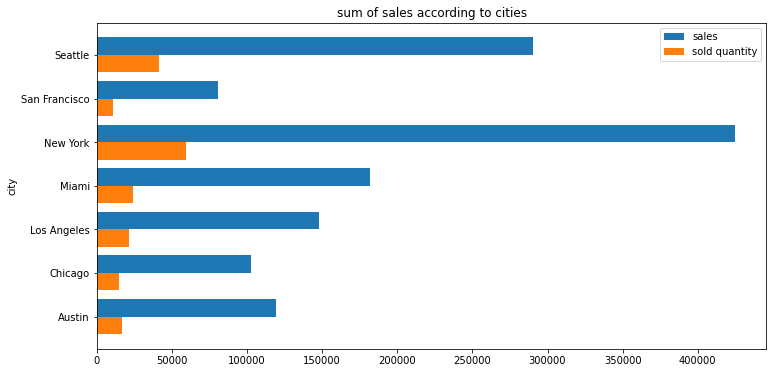

In [27]:
#grouped bar chart

plt.figure(figsize= (12,6))
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'],
        align= 'edge', height= 0.4)
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'],
        align= 'edge', height= -0.4)
plt.legend(['sales', 'sold quantity'])
plt.ylabel('city')
plt.title('sum of sales according to cities')
plt.show()

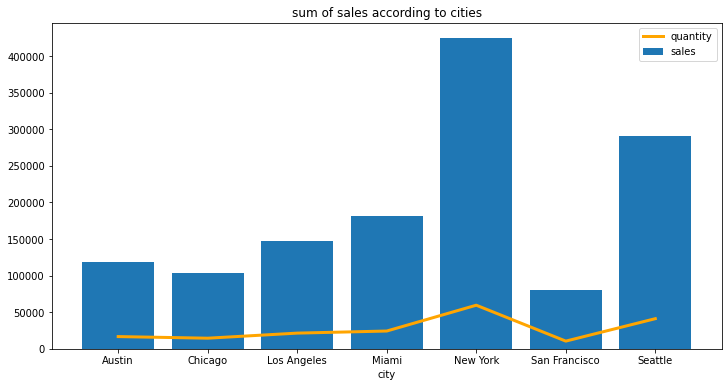

In [28]:
#combination plot

plt.figure(figsize= (12,6))
plt.plot(lures_by_city['CITY'], lures_by_city['QUANTITY'],
        color= 'orange', linewidth= 3)
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
plt.legend(['quantity', 'sales'])
plt.xlabel('city')
plt.title('sum of sales according to cities')
plt.show()

**simple formattiong**

*default color palette: blue, orange, gray*

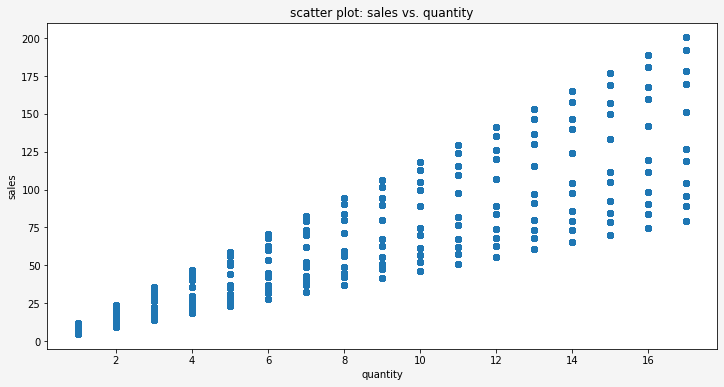

In [29]:
plt.figure(figsize= (12,6), facecolor= 'whitesmoke')
plt.scatter(lures['QUANTITY'], lures['SALES'])
plt.xlabel('quantity')
plt.ylabel('sales')
plt.title('scatter plot: sales vs. quantity')
plt.show()

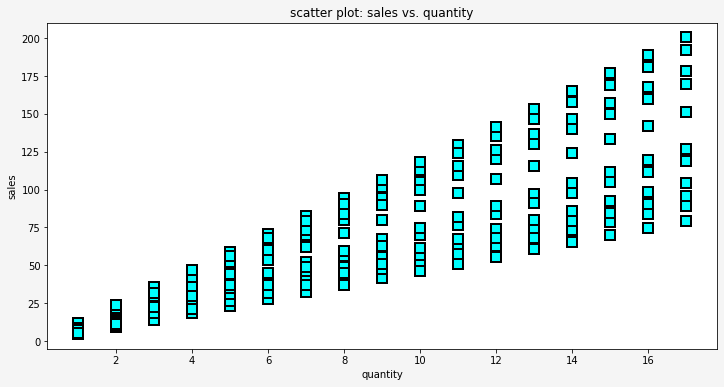

In [30]:
plt.figure(figsize= (12,6), facecolor= 'whitesmoke')
plt.scatter(lures['QUANTITY'], lures['SALES'],
           marker= 's', edgecolors= 'black',
           facecolors= 'aqua', linewidths= 2, s= 100)
#s= size of data points
plt.xlabel('quantity')
plt.ylabel('sales')
plt.title('scatter plot: sales vs. quantity')
plt.show()

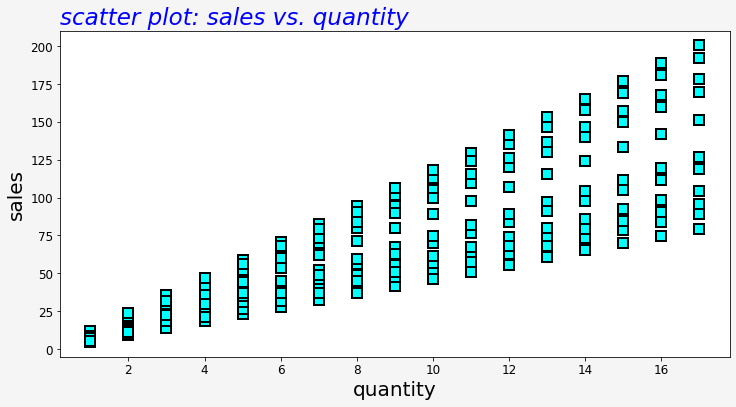

In [31]:
plt.figure(figsize= (12,6), facecolor= 'whitesmoke')
plt.scatter(lures['QUANTITY'], lures['SALES'],
           marker= 's', edgecolors= 'black',
           facecolors= 'aqua', linewidths= 2, s= 100)
#s= size of data points
plt.xlabel('quantity', fontsize= 20)
plt.ylabel('sales', fontsize= 20)
plt.tick_params(axis= 'both', labelsize= 'large')
plt.title('scatter plot: sales vs. quantity', fontsize= 23,
         loc= 'left', fontstyle= 'oblique', color= 'blue')
plt.show()

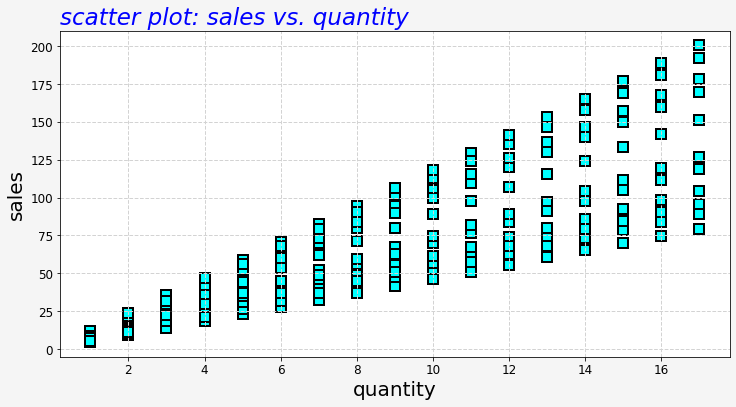

In [32]:
plt.figure(figsize= (12,6), facecolor= 'whitesmoke')
plt.scatter(lures['QUANTITY'], lures['SALES'],
           marker= 's', edgecolors= 'black',
           facecolors= 'aqua', linewidths= 2, s= 100)
#s= size of data points
plt.xlabel('quantity', fontsize= 20)
plt.ylabel('sales', fontsize= 20)
plt.tick_params(axis= 'both', labelsize= 'large')
plt.title('scatter plot: sales vs. quantity', fontsize= 23,
         loc= 'left', fontstyle= 'oblique', color= 'blue')
plt.grid(color= 'lightgray', linestyle= '--', linewidth= 1)
plt.show()

**style sheets**

In [33]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

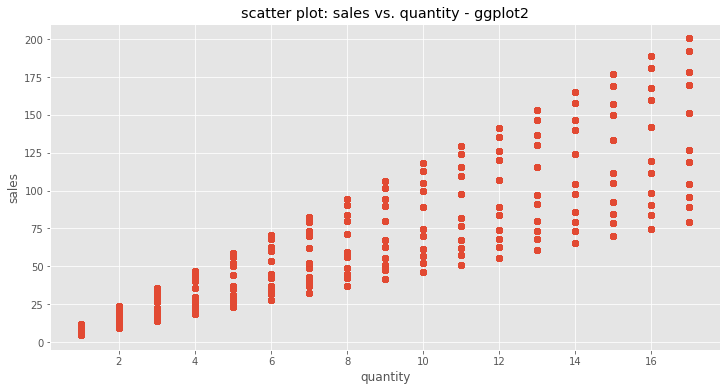

In [34]:
plt.style.use('ggplot')
plt.figure(figsize= (12,6))
plt.scatter(lures['QUANTITY'], lures['SALES'])
plt.xlabel('quantity')
plt.ylabel('sales')
plt.title('scatter plot: sales vs. quantity - ggplot2')
plt.show()

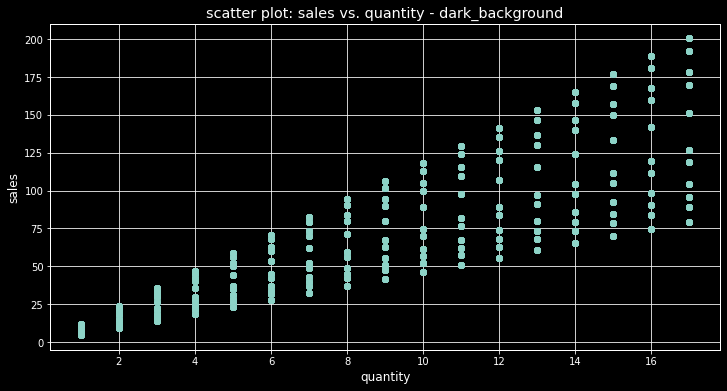

In [35]:
plt.style.use('dark_background')
plt.figure(figsize= (12,6))
plt.scatter(lures['QUANTITY'], lures['SALES'])
plt.xlabel('quantity')
plt.ylabel('sales')
plt.title('scatter plot: sales vs. quantity - dark_background')
plt.show()

**labels**

In [41]:
plt.style.use('default')

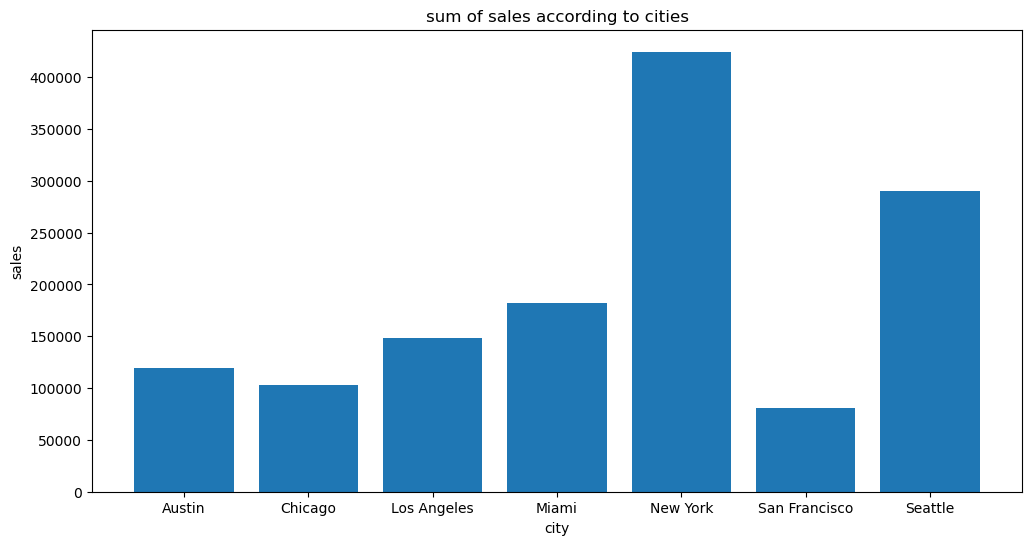

In [42]:
plt.figure(figsize= (12,6))
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
plt.ylabel('sales')
plt.xlabel('city')
plt.title('sum of sales according to cities')
plt.show()

In [43]:
sales = np.array(lures_by_city['SALES'])
city = np.array(lures_by_city['CITY'])

sales = np.round(sales, 0)
sales = sales.astype(int)

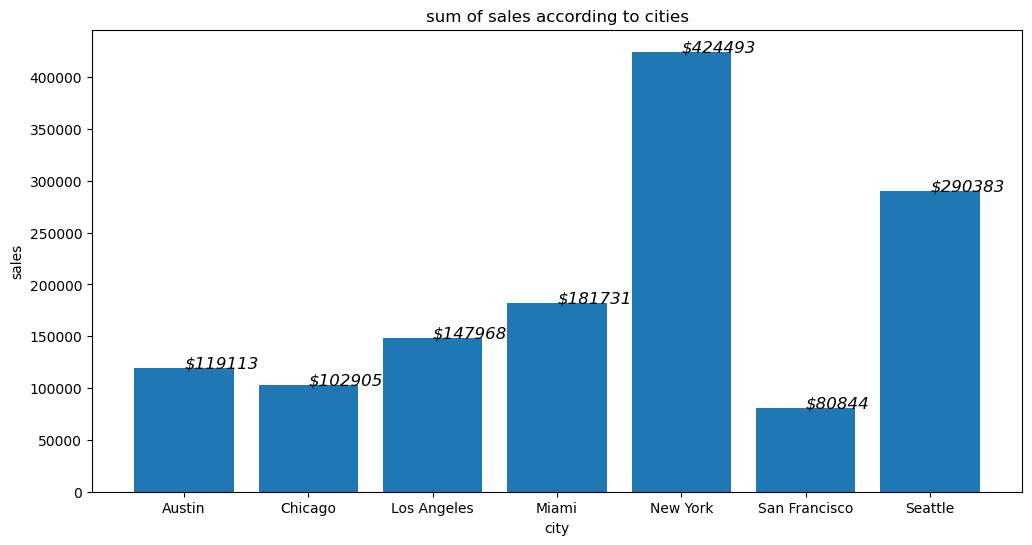

In [47]:
plt.figure(figsize= (12,6))
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
plt.ylabel('sales')
plt.xlabel('city')
plt.title('sum of sales according to cities')

for i in range(len(sales)):
    plt.annotate(s= ('$' + str(sales[i])), xy= (city[i], sales[i]),
                fontsize= 'large', fontstyle= 'oblique')
    
plt.show()

**subplots**

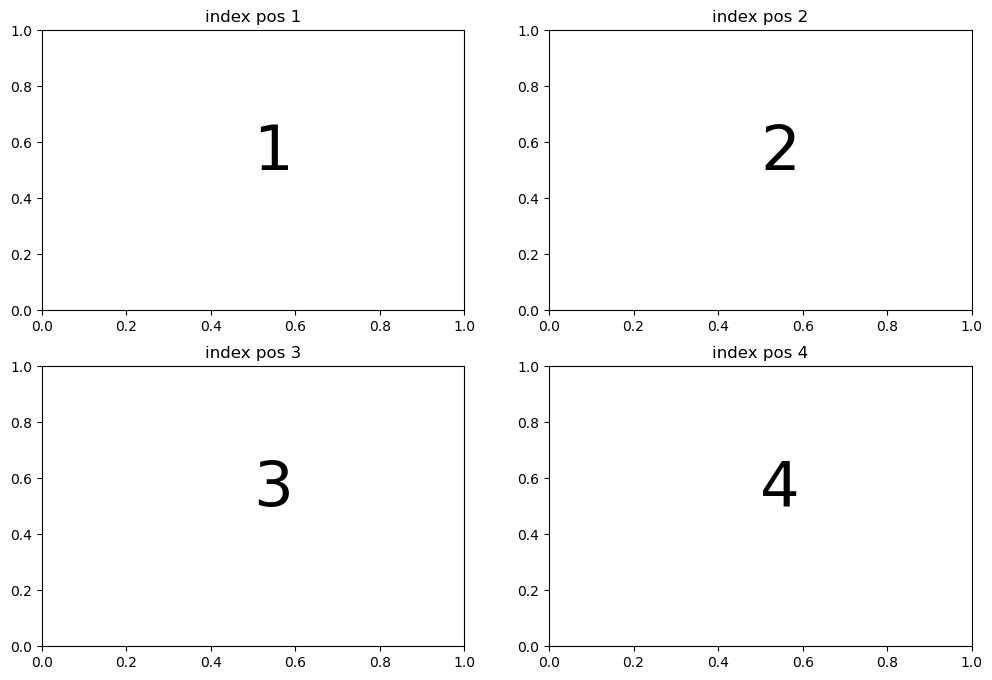

In [48]:
plt.figure(figsize= (12,8))
plt.subplot(221)
plt.title('index pos 1')
plt.annotate(s= '1', xy= (0.5, 0.5), fontsize= 45)

plt.subplot(222)
plt.title('index pos 2')
plt.annotate(s= '2', xy= (0.5, 0.5), fontsize= 45)

plt.subplot(223)
plt.title('index pos 3')
plt.annotate(s= '3', xy= (0.5, 0.5), fontsize= 45)

plt.subplot(224)
plt.title('index pos 4')
plt.annotate(s= '4', xy= (0.5, 0.5), fontsize= 45)
plt.show()

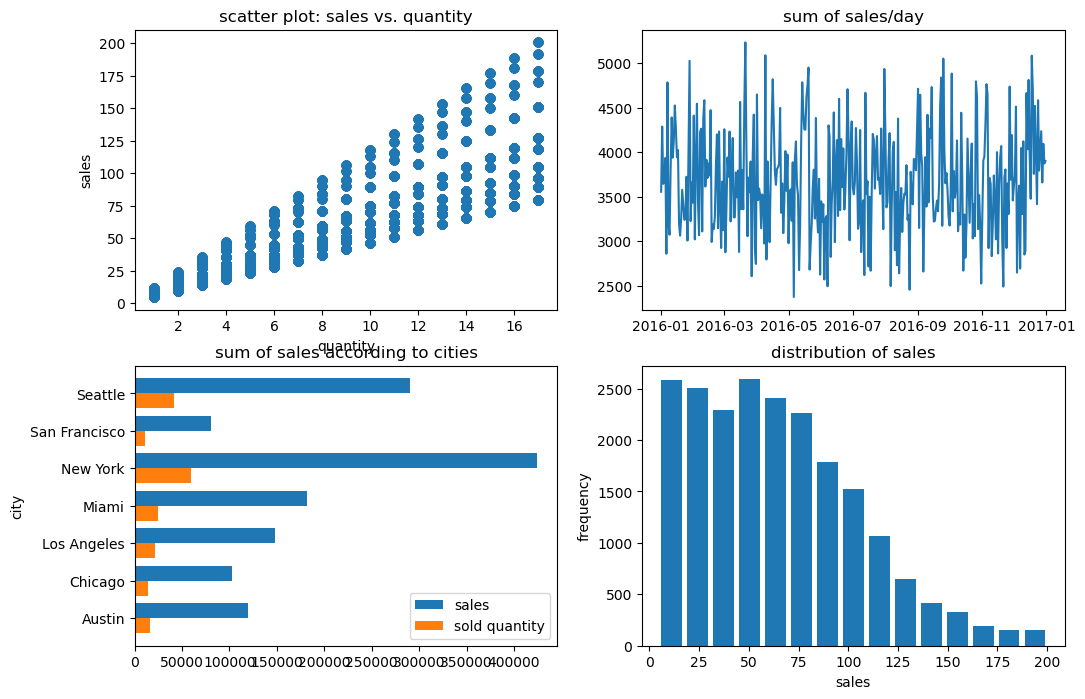

In [49]:
plt.figure(figsize= (12,8))

plt.subplot(221)
plt.scatter(lures['QUANTITY'], lures['SALES'])
plt.xlabel('quantity')
plt.ylabel('sales')
plt.title('scatter plot: sales vs. quantity')

plt.subplot(222)
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.title('sum of sales/day')

plt.subplot(223)
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'],
        align= 'edge', height= 0.4)
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'],
        align= 'edge', height= -0.4)
plt.legend(['sales', 'sold quantity'])
plt.ylabel('city')
plt.title('sum of sales according to cities')

plt.subplot(224)
plt.hist(lures['SALES'], bins= 15, rwidth= 0.8)
plt.xlabel('sales')
plt.ylabel('frequency')
plt.title('distribution of sales')

plt.tight_layout() #so that subplots don't overlap
plt.show()

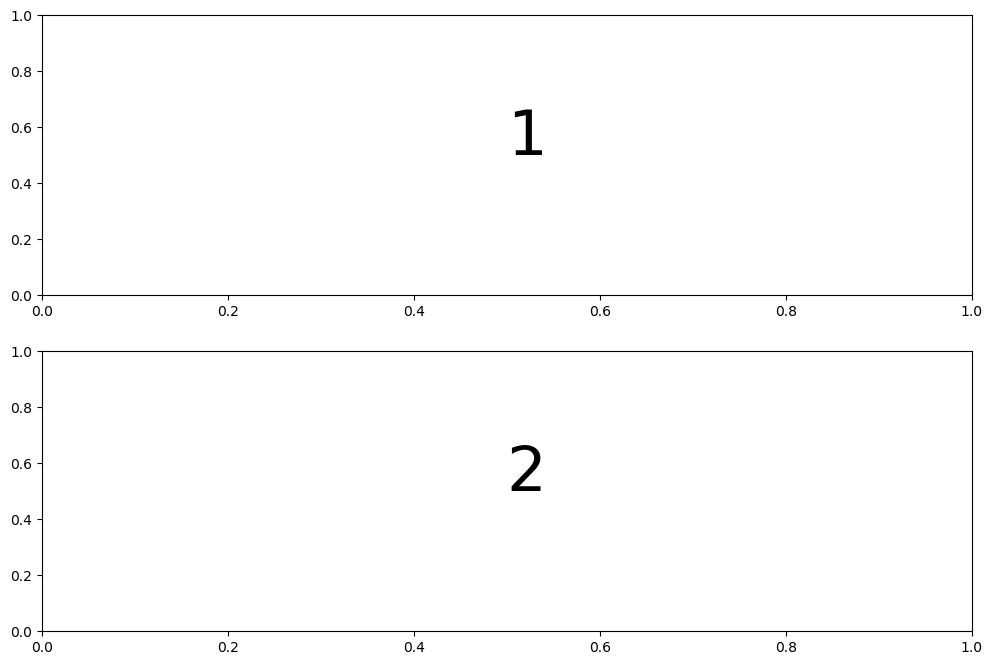

In [53]:
#layout 2x1

plt.figure(figsize= (12,8))

plt.subplot(211)
plt.annotate(s= '1', xy= (0.5, 0.5), fontsize= 45)

plt.subplot(212)
plt.annotate(s= '2', xy= (0.5, 0.5), fontsize= 45)

plt.show()

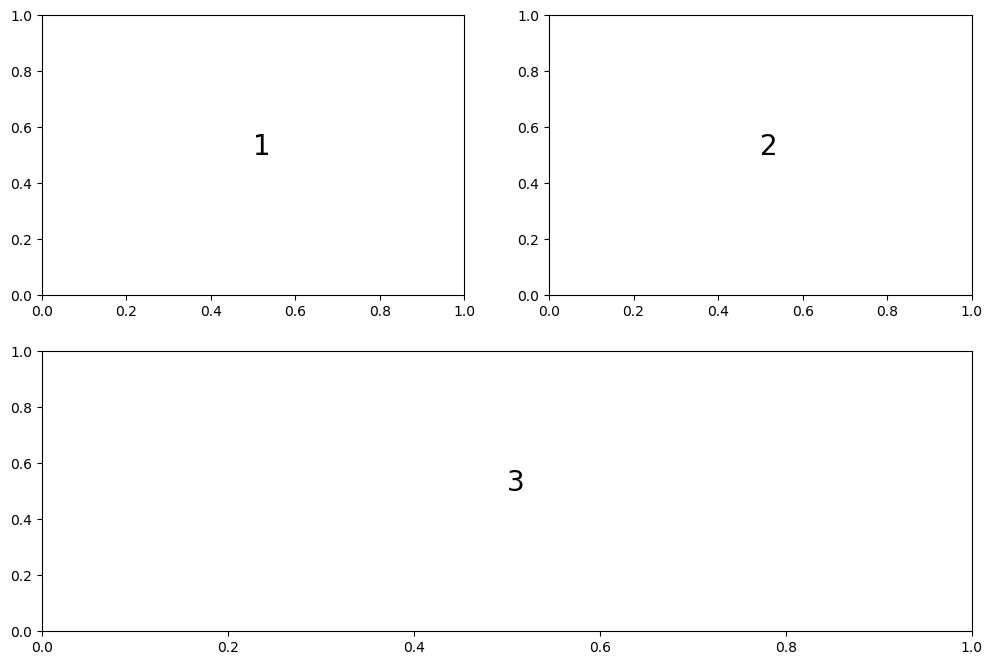

In [54]:
plt.figure(figsize= (12,8))

plt.subplot(221)
plt.annotate(s= '1', xy= (0.5, 0.5), fontsize= 20)

plt.subplot(222)
plt.annotate(s= '2', xy= (0.5, 0.5), fontsize= 20)

plt.subplot(212)
plt.annotate(s= '3', xy= (0.5, 0.5), fontsize= 20)

plt.show()

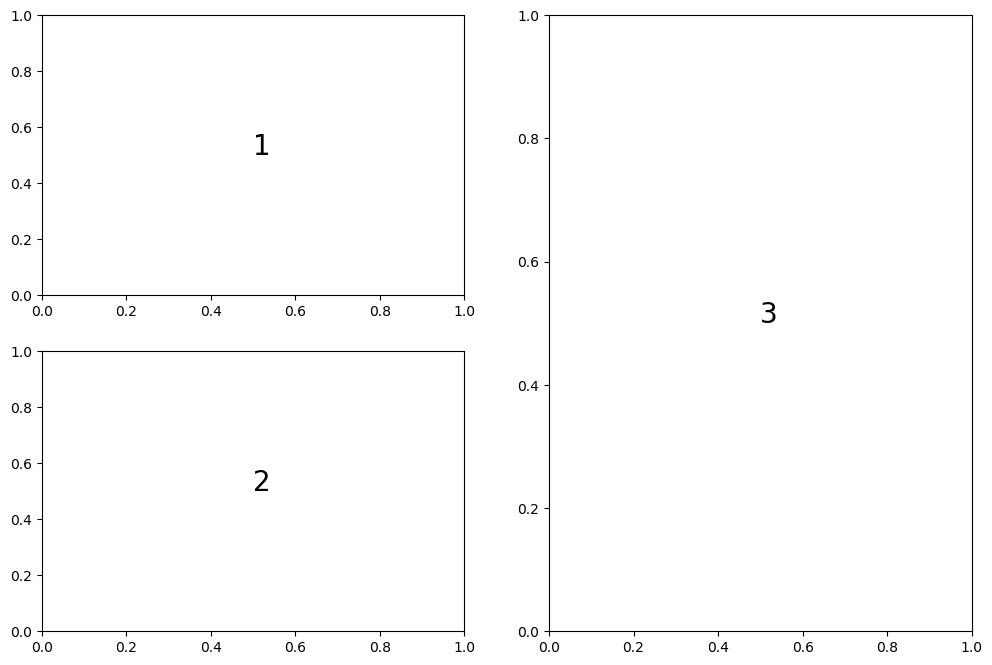

In [55]:
plt.figure(figsize= (12,8))

plt.subplot(221)
plt.annotate(s= '1', xy= (0.5, 0.5), fontsize= 20)

plt.subplot(223)
plt.annotate(s= '2', xy= (0.5, 0.5), fontsize= 20)

plt.subplot(122)
plt.annotate(s= '3', xy= (0.5, 0.5), fontsize= 20)

plt.show()